<h1>House Price Prediction</h1>

<h3>Importing Libraries </h3>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [6]:
ds1 = pd.read_csv('Bengaluru_House_Data.csv')

<h3>Total Rows & Columns</h3>

In [8]:
ds1.shape

(13320, 9)

<h3>Checking the features in the dataset</h3>

In [10]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<h3>Sample Dataset</h3>

In [12]:
ds1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [13]:
ds = ds1.copy()

<h2>Data Cleaning</h2>

<h3>Checking For Null Data</h3>

In [16]:
ds1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<h2>Handling Null Values</h2>

<h4>Dropping samples with 3 or more missing records</h4>

In [19]:
ds.dropna(axis=0, thresh = 7, inplace = True)

In [20]:
ds.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [21]:
ds[pd.isnull(ds["location"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [22]:
ds[ds["society"] == "Grare S"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [23]:
ds["location"] = ds["location"].fillna("Anantapura")

In [24]:
ds.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [25]:
ds["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

##### We can relabel them to have only numberical data

<h3>Adding the "bhk" feature extracted from size</h3>

In [28]:
ds["bhk"] = ds["size"].apply(lambda x: int(x.split(" ")[0]))

In [29]:
ds.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [30]:
def fcnIsFloat(x):
    try:
        float(x)
    except:
        return False
    return True

ds[~ds["total_sqft"].apply(fcnIsFloat)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760,2
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.570,1
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135,2


**Above shows that total_sqft can be a range (e.g. 2100-2850). For such cases average of min and max value in the range is taken.**

In [32]:
metrics = []

def fcnIsFloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def fcnConvertToSqFt(x, metric):
    conversion_factors = {
        "Acres": 43560,
        "Cents": 435.6,
        "Grounds": 2400,
        "Guntha": 1088.98,
        "Perch": 272.25,
        "Sq. Meter": 10.7639,
        "Sq. Yards": 9
    }
    return x * conversion_factors.get(metric, np.nan)

def fcnExtractTotalSqft(x):
    if pd.isna(x):
        return np.nan
    try:
        values = x.split("-")
        return np.mean(list(map(float, values)))
    except Exception as e:
        for intIndex in range(len(x)-1, -1, -1):
            if fcnIsFloat(x[0:intIndex]):
                return fcnConvertToSqFt(float(x[0:intIndex]), x[intIndex:])
        return np.nan

In [33]:
ds["sqft"] = ds["total_sqft"].apply(fcnExtractTotalSqft)

In [34]:
ds.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2,1200.0


In [35]:
ds.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
bhk                0
sqft               0
dtype: int64

<h3>Dropping Unwanted Columns</h3>

In [37]:
ds.drop(["society", "size", "total_sqft","balcony","area_type","availability","bath"], inplace = True, axis=1)

In [38]:
ds.head()

,location,price,bhk,sqft
0,Electronic City Phase II,39.07,2,1056.0
1,Chikka Tirupathi,120.00,4,2600.0
2,Uttarahalli,62.00,3,1440.0
3,Lingadheeranahalli,95.00,3,1521.0
4,Kothanur,51.00,2,1200.0


In [39]:
ds.head()

,location,price,bhk,sqft
0,Electronic City Phase II,39.07,2,1056.0
1,Chikka Tirupathi,120.00,4,2600.0
2,Uttarahalli,62.00,3,1440.0
3,Lingadheeranahalli,95.00,3,1521.0
4,Kothanur,51.00,2,1200.0


In [40]:
ds.isnull().sum()

location    0
price       0
bhk         0
sqft        0
dtype: int64

##### Relabelling few locations as Others whose count was less than 10

In [42]:
ds["location"] = ds["location"].apply(lambda x: x.strip())

In [43]:
unique_location_count = ds.groupby("location")["location"].agg("count").sort_values(ascending = False)
unique_location_count

location
Whitefield                            540
Sarjapur  Road                        397
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [44]:
unique_location_count_10 = unique_location_count[unique_location_count <= 10]

In [45]:
ds["location"] = ds["location"].apply(lambda x : "Other" if x in unique_location_count_10 else x)

In [46]:
ds["location"].nunique()

242

<h3>Outlier Removal</h3>

##### Adding a feature "price_per_sqft" and "sqft_per_bhk" that can help detect outliers

In [49]:
ds["price_per_sqft"] = ds["price"] * 100000 / ds["sqft"]

In [50]:
ds["sqft_per_bhk"] = ds["sqft"] / ds["bhk"]

In [51]:
ds.head()

,location,price,bhk,sqft,price_per_sqft,sqft_per_bhk
0,Electronic City Phase II,39.07,2,1056.0,3699.810606,528.0
1,Chikka Tirupathi,120.00,4,2600.0,4615.384615,650.0
2,Uttarahalli,62.00,3,1440.0,4305.555556,480.0
3,Lingadheeranahalli,95.00,3,1521.0,6245.890861,507.0
4,Kothanur,51.00,2,1200.0,4250.000000,600.0


<h4>Removing samples that show sqft_per_bhk to be less than 300 and more than 1200 as it looks like an outlier </h4>

In [53]:
ds = ds[~(ds["sqft_per_bhk"] < 300)]
ds = ds[~(ds["sqft_per_bhk"] > 1200)]

In [54]:
ds.shape

(12349, 6)

<h4>Removing Samples with sqft > 6000 as it look like an outlier</h4>

In [56]:
ds = ds[~(ds["sqft"] > 6000)]

In [57]:
ds.shape

(12339, 6)

<h4>Removing samples with price_per_sqft > 20000</h4>

In [59]:
ds = ds[~(ds["price_per_sqft"] > 20000)]

In [60]:
ds.shape

(12210, 6)

<h4>Removing samples with bhk > 6</h4>

In [62]:
ds = ds[~(ds["bhk"] > 6)]

In [63]:
ds.shape

(12134, 6)

**Properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area) are to be removed.**

In [65]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [66]:
ds.shape

(12134, 6)

In [67]:
ds = remove_bhk_outliers(ds)

In [68]:
ds.shape

(8544, 6)

In [69]:
ds.head()

,location,price,bhk,sqft,price_per_sqft,sqft_per_bhk
0,Electronic City Phase II,39.07,2,1056.0,3699.810606,528.0
2,Uttarahalli,62.00,3,1440.0,4305.555556,480.0
3,Lingadheeranahalli,95.00,3,1521.0,6245.890861,507.0
4,Kothanur,51.00,2,1200.0,4250.000000,600.0
6,Old Airport Road,204.00,4,2732.0,7467.057101,683.0


<h4>Dropping Unwanted Features</h4>

In [71]:
ds.drop(["price_per_sqft", "sqft_per_bhk"], axis = 1, inplace = True)

In [72]:
ds.head()

,location,price,bhk,sqft
0,Electronic City Phase II,39.07,2,1056.0
2,Uttarahalli,62.00,3,1440.0
3,Lingadheeranahalli,95.00,3,1521.0
4,Kothanur,51.00,2,1200.0
6,Old Airport Road,204.00,4,2732.0


In [73]:
ds = pd.get_dummies(ds)

In [74]:
ds.head()

,price,bhk,sqft,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,39.07,2,1056.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,62.00,3,1440.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95.00,3,1521.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,51.00,2,1200.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,204.00,4,2732.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
ds.shape

(8544, 245)

In [76]:
ds = ds.drop('location_Other',axis='columns')

In [77]:
ds.shape

(8544, 244)

In [78]:
ds.to_csv("Cleaned_Data.csv")

<h2>Model Building</h2>

In [80]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [81]:
X = ds.drop(columns=['price'])
y = ds['price']

In [82]:
X.head()

,bhk,sqft,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2,1056.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1440.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1521.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1200.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,4,2732.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
y.head()

0     39.07
2     62.00
3     95.00
4     51.00
6    204.00
Name: price, dtype: float64

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [85]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.7753507176173848

In [86]:
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.7751811539166513

In [87]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.7238325112984502

In [88]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.6767070935637101

In [89]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.7434373100051341

In [90]:
ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(X_train, y_train)
ab_reg.score(X_test, y_test)

0.698648483601838

In [91]:
gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
gb_reg.fit(X_train, y_train)
gb_reg.score(X_test, y_test)

0.4730709056196186

In [92]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test, y_test)

0.7912756290764176

In [93]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.5, 0.9],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.5, 0.9]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100],
                'max_depth': [4, 8]
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 200]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_jobs=-1)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score'])
find_best_model_using_gridsearchcv(X, y)

,model,best_score
0,linear_regression,0.774245
1,lasso,0.730710
2,ridge,0.773858
3,random_forest,0.752826
4,xgboost,0.789786


In [94]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X, y)
xgb_reg.score(X, y)

0.8649663695605252

<h3>Model Evaluation</h3>

In [96]:
y_pred = xgb_reg.predict(X_test)
print("R2 Score:" , r2_score(y_test ,y_pred))

R2 Score: 0.8650593487542997


<h3>Actual vs Predicted House Prices</h3>

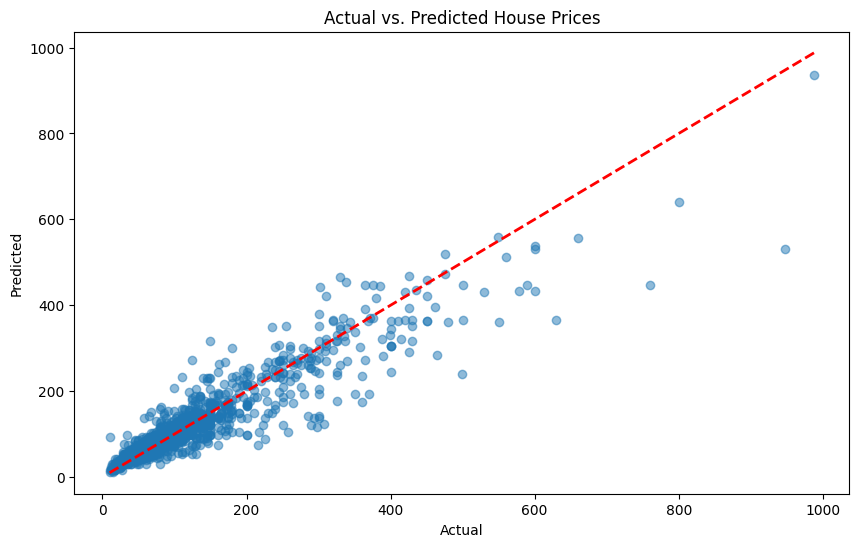

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

<h4>A scatter plot comparing actual vs. predicted house prices was created to visualize the 
model's performance. The plot shows a strong correlation between the actual and 
predicted values, with points closely aligned along the 45-degree line, indicating 
accurate predictions.</h4>

In [99]:
import pickle
pickle.dump(xgb_reg , open('price_prediction.pkl', 'wb'))
pickle.dump(ds , open('dataset.pkl','wb'))